In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("sales_data_sample.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 5327: invalid start byte

In [9]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [3]:
df.info()

NameError: name 'df' is not defined

In [4]:
plt.figure(figsize = (30,26))
sns.heatmap(df.corr(),annot = True)

NameError: name 'df' is not defined

<Figure size 3000x2600 with 0 Axes>

In [5]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS','POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(df_drop, axis=1)

NameError: name 'df' is not defined

In [6]:
df.head()

NameError: name 'df' is not defined

In [13]:
df.shape

(2823, 13)

In [14]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [15]:
df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
COUNTRY             object
DEALSIZE            object
dtype: object

In [16]:
country = pd.get_dummies(df['COUNTRY'])
productline = pd.get_dummies(df['PRODUCTLINE'])
Dealsize = pd.get_dummies(df['DEALSIZE'])

In [17]:
df = pd.concat([df,country,productline,Dealsize], axis = 1)

In [18]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0


In [19]:
df_drop  = ['COUNTRY','PRODUCTLINE','DEALSIZE']
df = df.drop(df_drop, axis=1)

In [20]:
df.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE          object
Australia             uint8
Austria               uint8
Belgium               uint8
Canada                uint8
Denmark               uint8
Finland               uint8
France                uint8
Germany               uint8
Ireland               uint8
Italy                 uint8
Japan                 uint8
Norway                uint8
Philippines           uint8
Singapore             uint8
Spain                 uint8
Sweden                uint8
Switzerland           uint8
UK                    uint8
USA                   uint8
Classic Cars          uint8
Motorcycles           uint8
Planes                uint8
Ships                 uint8
Trains                uint8
Trucks and Buses      uint8
Vintage Cars        

In [21]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [22]:
df.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE            int8
Australia             uint8
Austria               uint8
Belgium               uint8
Canada                uint8
Denmark               uint8
Finland               uint8
France                uint8
Germany               uint8
Ireland               uint8
Italy                 uint8
Japan                 uint8
Norway                uint8
Philippines           uint8
Singapore             uint8
Spain                 uint8
Sweden                uint8
Switzerland           uint8
UK                    uint8
USA                   uint8
Classic Cars          uint8
Motorcycles           uint8
Planes                uint8
Ships                 uint8
Trains                uint8
Trucks and Buses      uint8
Vintage Cars        

In [23]:
df.drop('ORDERDATE', axis=1, inplace=True)

In [24]:
df.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE            int8
Australia             uint8
Austria               uint8
Belgium               uint8
Canada                uint8
Denmark               uint8
Finland               uint8
France                uint8
Germany               uint8
Ireland               uint8
Italy                 uint8
Japan                 uint8
Norway                uint8
Philippines           uint8
Singapore             uint8
Spain                 uint8
Sweden                uint8
Switzerland           uint8
UK                    uint8
USA                   uint8
Classic Cars          uint8
Motorcycles           uint8
Planes                uint8
Ships                 uint8
Trains                uint8
Trucks and Buses      uint8
Vintage Cars          uint8
Large               

In [25]:
from sklearn.cluster import KMeans

In [26]:
WCSS = [] # Withhin Cluster Sum of Squares from the centroid

In [27]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

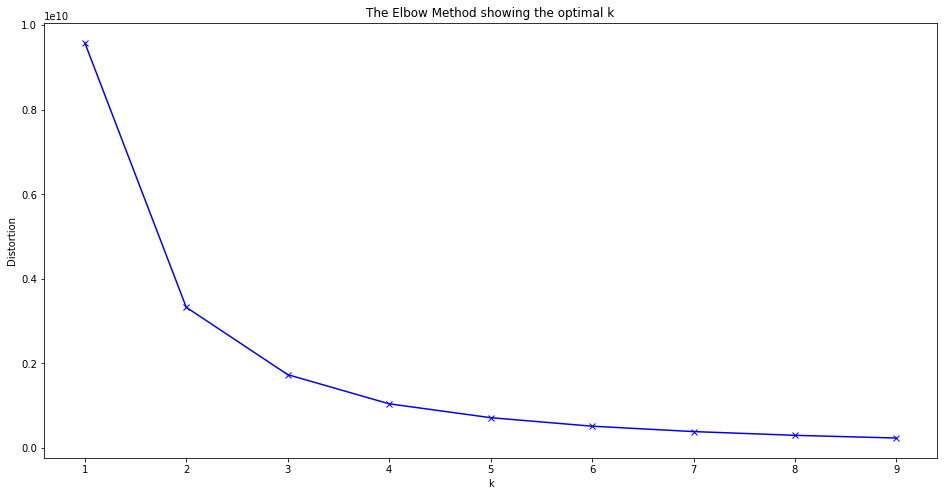

In [28]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
kmeanModel = KMeans(n_clusters=3)
y_kmeans = kmeanModel.fit_predict

In [30]:
plt.scatter(df['y'])

KeyError: 'y'

In [ ]:
print(y_kmeans)

In [ ]:
plt.figure(figsize = (30,26))
sns.heatmap(df.corr(),annot = True)

In [ ]:
pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,0),timings = False)
visualizer.fit(df)
visualizer.show()

In [31]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2,5,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,3,7,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0


In [32]:
from sklearn.preprocessing import Normalizer

In [33]:
df_scaled = Normalizer(df)

In [34]:
df_x = pd.DataFrame(df_scaled,columns = df.columns )

ValueError: DataFrame constructor not properly called!